#### Importing dependencies

In [28]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

#### Loading the dataset

In [2]:
data = load_iris(as_frame=True)

In [3]:
feature_data=data['data']
target_data=data['target']

In [4]:
frame = data['frame']

In [5]:
from sklearn.model_selection import train_test_split
from logzero import logger

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(feature_data,target_data,random_state= 42)
logger.info(f"Shape after test train split:\nTrain:{X_train.shape}{Y_train.shape}\nTest:{X_test.shape}{Y_test.shape}")

[I 230212 20:30:37 584986130:2] Shape after test train split:
    Train:(112, 4)(112,)
    Test:(38, 4)(38,)


#### Visualization:
###### PCA

In [22]:
from sklearn.decomposition import PCA

In [24]:
## Initializing the object for PCA-decomposition
pca = PCA(n_components=2)
pca_components=pca.fit_transform(feature_data)

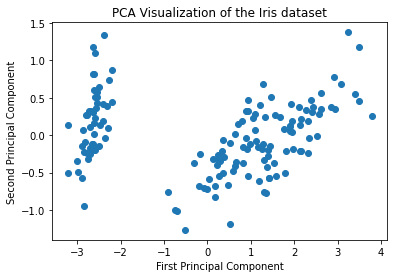

In [40]:
##Plotting the transformed components
plt.scatter(pca_components[:,0], pca_components[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Visualization of the Iris dataset')
plt.show()

In [41]:
pca_components.shape

(150, 2)

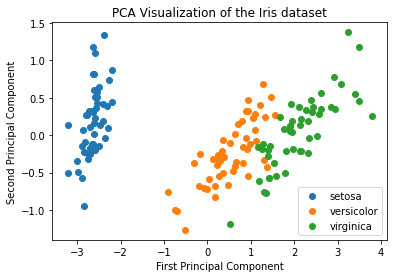

In [56]:
## Plotting the class-lables:
for _id, _label in enumerate(data.target_names):
    samples = pca_components[target_data == _id]
    plt.scatter(samples[:,0], samples[:,1], label = _label)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Visualization of the Iris dataset')
plt.legend()
plt.show()

##### t-SNE

In [32]:
from sklearn.manifold import TSNE

In [33]:
tsne = TSNE(n_components=2)
tsne_components = tsne.fit_transform(feature_data)

/home/manisha/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/manisha/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


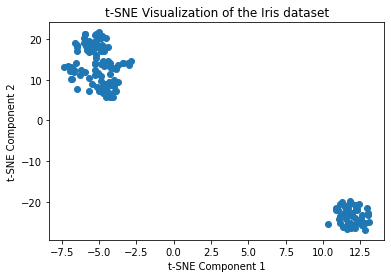

In [37]:
plt.scatter(tsne_components[:,0], tsne_components[:,1])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of the Iris dataset')
plt.show()

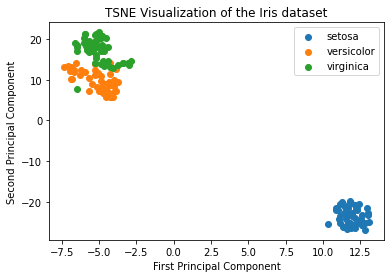

In [55]:
for _id, _label in enumerate(data.target_names):
    samples = tsne_components[target_data == _id]
    plt.scatter(samples[:,0], samples[:,1], label = _label)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('TSNE Visualization of the Iris dataset')
plt.legend()
plt.show()

### Implimenting SVM Classifier

In [7]:
from sklearn import svm

In [8]:
model = svm.SVC(kernel='linear')

model.fit(X=X_train, y=Y_train)

SVC(kernel='linear')

In [9]:
pred=model.predict(X= X_test)

In [10]:
pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [13]:
print(f"Accuracy:{np.mean(Y_test == pred)}")

Accuracy:1.0


In [14]:
from sklearn.metrics import accuracy_score

print(f"Accuracy:{accuracy_score(y_pred=pred, y_true=Y_test)}")

Accuracy:1.0


#### Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
model = RandomForestClassifier(n_estimators= 10)
model.fit(X=X_train, y=Y_train)
y_pred=model.predict(X=X_test)

In [19]:
print(f"Accuracy:{np.mean(Y_test == y_pred)}")

Accuracy:1.0


### Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
dc_model = DecisionTreeClassifier()
dc_model.fit(X=X_train, y=Y_train)
dc_pred = dc_model.predict(X=X_test)

In [21]:
dc_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

##### Visualizing Decision tree we just built

In [45]:
from sklearn.tree import plot_tree

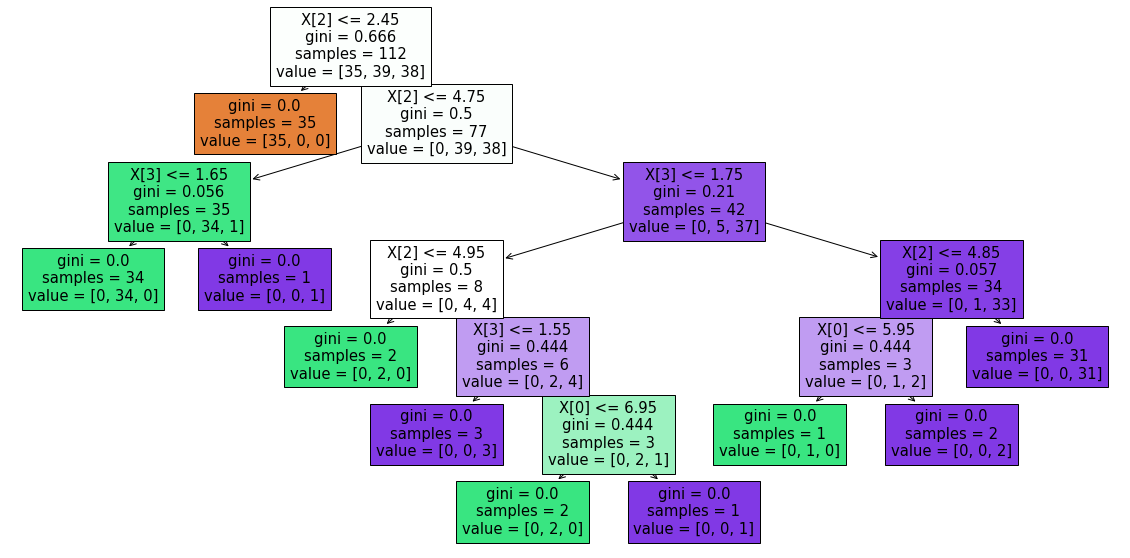

In [51]:
plt.figure(figsize=(20,10))
plot_tree(dc_model, filled=True)
plt.show()

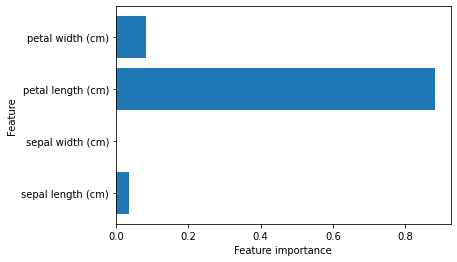

In [53]:
# Plot the feature importances
n_features = data.data.shape[1]
plt.barh(range(n_features), dc_model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), data.feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()